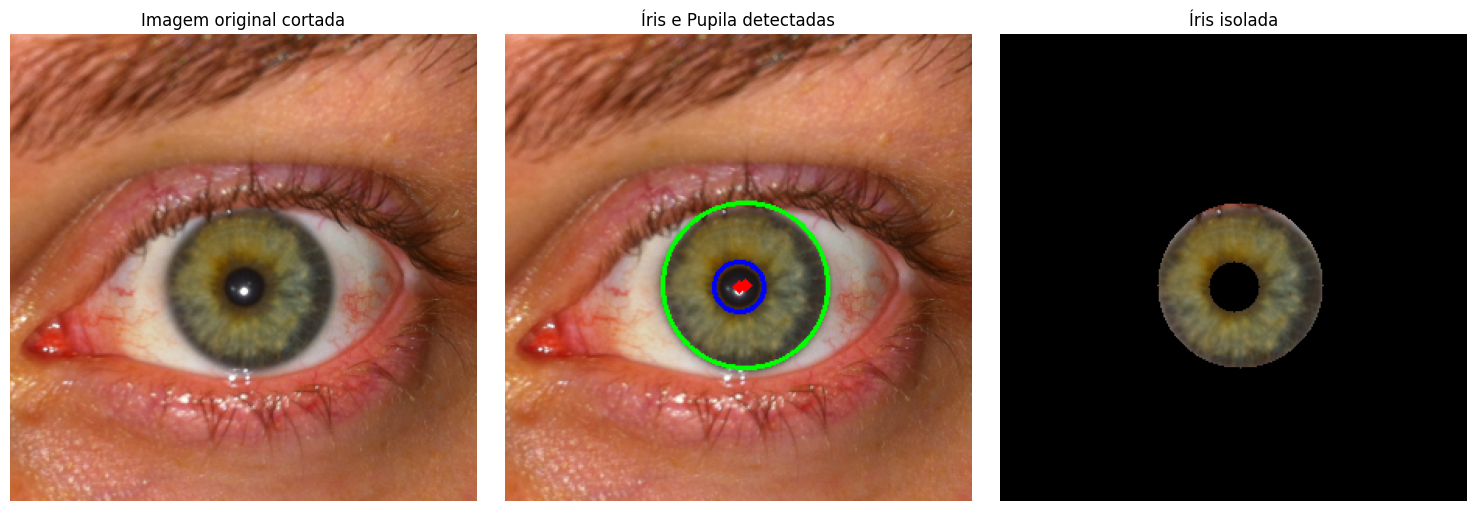

In [73]:
# Maria Júlia Testoni
# Separar a iris

import cv2
import numpy as np
from matplotlib import pyplot as plt

def encontraMelhorThreshold_(roi_gray):
    std = np.std(roi_gray)
    media = np.mean(roi_gray)
    
    if media < 100 and std > 15:
        # Imagem escura e com contraste -> usar inverso
        return 40, cv2.THRESH_BINARY_INV  
    else:
        # Imagem clara ou pouco contraste
        return 63, cv2.THRESH_BINARY

         
#img = cv2.imread('004_L_02.JPG')
# img = cv2.imread('002_R_01.JPG')
img = cv2.imread('002_L_03.JPG')

# Reduz a imagem para focar no olho
desired_width = 800
scale = desired_width / img.shape[1]
new_height = int(img.shape[0] * scale)
diminui_img = cv2.resize(img, (desired_width, new_height), interpolation=cv2.INTER_AREA)
x, y, w, h = 250, 150, 300, 300 
img_cortada = diminui_img[y:y+h, x:x+w]
roi = cv2.cvtColor(img_cortada, cv2.COLOR_BGR2GRAY)

# ========== Iris =======
_, threshold = cv2.threshold(roi, 83, 255, cv2.THRESH_BINARY)
altura_roi, largura_roi = roi.shape
raio = int(min(altura_roi, largura_roi) / 3)
min_raio = int(raio * 0.4)
max_raio = int(raio * 0.9)
iris = cv2.HoughCircles(threshold, cv2.HOUGH_GRADIENT, 1.5, 150,param1=100, param2=30, minRadius=min_raio, maxRadius=max_raio)
iris = np.uint16(np.around(iris))

# ========== Pupila =======
roi_blur =  cv2.GaussianBlur(roi, (9, 9), 2)
valor_thresh, tipo_thresh = encontraMelhorThreshold_(roi_blur)
_, threshold = cv2.threshold(roi_blur, valor_thresh, 255, tipo_thresh)
min_raio = int(raio * 0.15)
max_raio = int(raio * 0.35)
pupila = cv2.HoughCircles(threshold, cv2.HOUGH_GRADIENT, 1.4, 150, param1=150, param2=18, minRadius=min_raio, maxRadius=max_raio)
pupila = np.uint16(np.around(pupila))

# ======= Circulos detectados =====
com_circulos = img_cortada.copy()
for i in iris[0,:]:
    cv2.circle(com_circulos, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(com_circulos, (i[0], i[1]), 2, (0, 0, 255), 3)
for i in pupila[0,:]:
    cv2.circle(com_circulos, (i[0], i[1]), i[2], (255, 0, 0), 2)
    cv2.circle(com_circulos, (i[0], i[1]), 2, (0, 0, 255), 3)
    
# ======= Separa iris da pupila =====
mask = np.zeros(roi.shape, dtype=np.uint8)
for c in iris[0, :]:
    cv2.circle(mask, (c[0], c[1]), c[2], 255, -1)
for c in pupila[0, :]:
    cv2.circle(mask, (c[0], c[1]), c[2], 0, -1)
iris_color = cv2.bitwise_and(img_cortada, img_cortada, mask=mask)

# ======= Apresenta =====
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Imagem original cortada")
plt.imshow(cv2.cvtColor(img_cortada, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Íris e Pupila detectadas")
plt.imshow(cv2.cvtColor(com_circulos, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Íris isolada")
plt.imshow(cv2.cvtColor(iris_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()